In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import PIL
from PIL import Image

In [2]:
def get_noisy_image(img_np, sigma):
    """Adds Gaussian noise to an image.
    
    Args: 
        img_np: image, np.array with values from 0 to 1
        sigma: std of the noise
    """
    img_noisy_np = np.clip(img_np + np.random.normal(scale=sigma, size=img_np.shape), 0, 1).astype(np.float32)
    img_noisy_pil = np_to_pil(img_noisy_np)

    return img_noisy_pil, img_noisy_np

In [3]:
def np_to_pil(img_np):
    """Converts image in np.array format to PIL image.

    From C x W x H [0..1] to  W x H x C [0...255]
    """
    ar = np.clip(np.rint(img_np * 255), 0, 255).astype(np.uint8)

    if img_np.shape[0] == 1:
        ar = ar[0]
    else:
        ar = ar.transpose(1, 2, 0)

    return Image.fromarray(ar)


In [4]:
def crop_image(img, d=32):
    '''Make dimensions divisible by `d`'''

    new_size = (img.size[0] - img.size[0] % d, 
                img.size[1] - img.size[1] % d)

    bbox = [
            int((img.size[0] - new_size[0])/2), 
            int((img.size[1] - new_size[1])/2),
            int((img.size[0] + new_size[0])/2),
            int((img.size[1] + new_size[1])/2),
    ]

    img_cropped = img.crop(bbox)
    return img_cropped

In [5]:
def load(path):
    """Load PIL image."""
    img = Image.open(path)
    return img

In [6]:
def get_image(path, imsize=-1):
    """Load an image and resize to a cpecific size. 

    Args: 
        path: path to image
        imsize: tuple or scalar with dimensions; -1 for `no resize`
    """
    img = load(path)

    if isinstance(imsize, int):
        imsize = (imsize, imsize)

    if imsize[0]!= -1 and img.size != imsize:
        if imsize[0] > img.size[0]:
            img = img.resize(imsize, Image.BICUBIC)
        else:
            img = img.resize(imsize, Image.ANTIALIAS)

    img_np = pil_to_np(img)

    return img, img_np

In [7]:
# - transformation functions pil <-> numpy <-> torch
def pil_to_np(img_PIL):
    """Converts image in PIL format to np.array.

    From W x H x C [0...255] to C x W x H [0..1]
    """
    ar = np.array(img_PIL, np.float32)

    if len(ar.shape) == 3:
        ar = ar.transpose(2, 0, 1)
    else:
        ar = ar[None, ...]

    return ar / 255.

In [8]:
fname = 'kodim23_small_ORG.png' 
img_pil = crop_image(get_image(fname,-1)[0], d=32)
img_np = pil_to_np(img_pil)

sigma = 25
img_noisy_pil, img_noisy_np = get_noisy_image(img_np, sigma/255.)    
img_noisy_pil.save('imgNoiseKdim23.png')

In [9]:
def printImgs(images, n=1, m=1, title='',name=''):
    
    images = images[:n*m]
    fig, axs = plt.subplots(
        nrows=n, ncols=m, 
        figsize=(15, 20), 
        subplot_kw={
            'xticks': [], 
            'yticks': []
        }
    )
    i=0
    for ax, image in zip(axs.flat, images):
        ax.imshow(image, )
        ax.title.set_text(name[i])
        i=i+1
    plt.savefig(title)    
    plt.show()

In [10]:
imgOrg = img_np.copy()
imgOrg = np.transpose(imgOrg, (1,2,0)) 



imgDIP =  cv2.imread('res_kodim23_5000iter_DIP.png')
imgDIP = cv2.cvtColor(imgDIP , cv2.COLOR_BGR2RGB)
#imgDIP = np.transpose(imgDIP, (1,2,0)) 

imgVTV =  cv2.imread('denoised_kodim23_maxpsnravg_VTV.png')
imgVTV = cv2.cvtColor(imgVTV , cv2.COLOR_BGR2RGB)
#imgVTV = np.transpose(imgVTV, (1,2,0)) 

imgDirac =  cv2.imread('denoised_kodim23_maxpsnravg_VTV.png')
imgDirac = cv2.cvtColor(imgDirac , cv2.COLOR_BGR2RGB)

imgNoi = np.transpose(img_noisy_np, (1,2,0)) 

ls= [imgOrg,imgNoi,imgDIP, imgVTV,imgDirac]

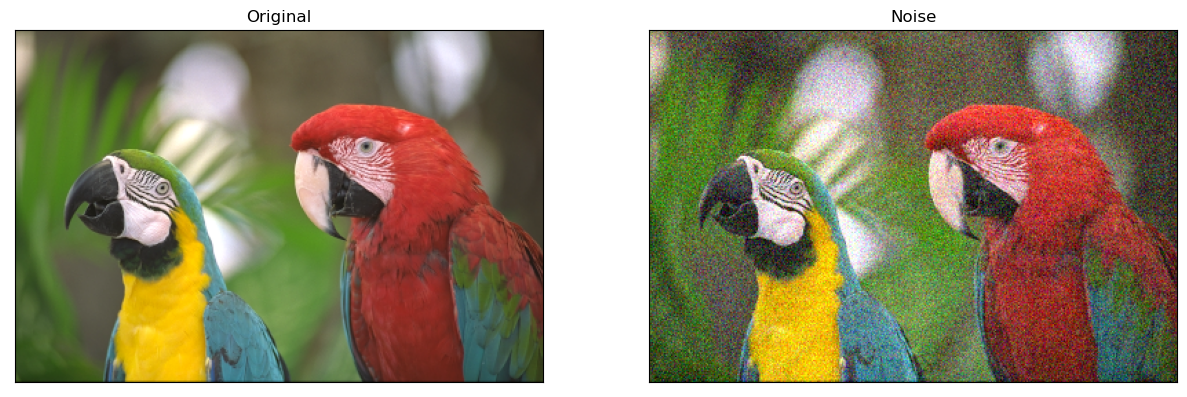

In [11]:
namefig = "Kodim23Compa1.png" 
names=['Original','Noise']
printImgs(ls, 1, 2, namefig,names)

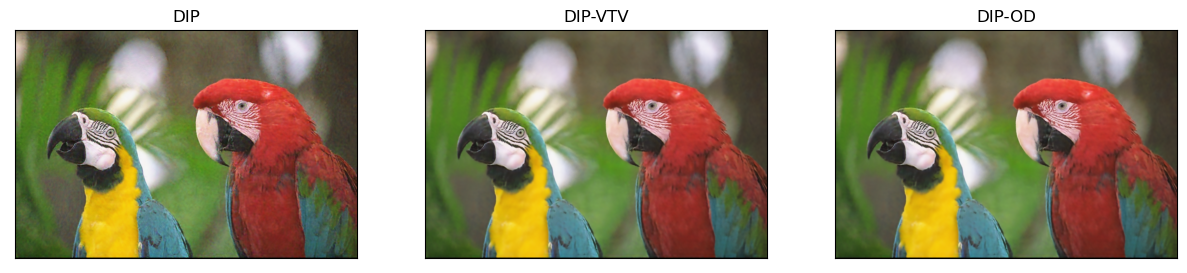

In [12]:
namefig = "Kodim23Compa2.png" 
names=['DIP','DIP-VTV','DIP-OD']
printImgs(ls[2:], 1, 3, namefig,names)

In [11]:
im=ls[0]

In [24]:
print( im.shape)
im = np.transpose(im, (1,2,0)) 
print (im.shape)

(384, 3, 256)
(3, 256, 384)


In [25]:
imgDIP.shape

(512, 768, 3)

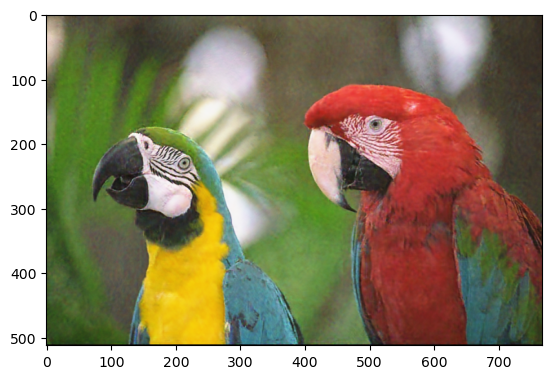

In [26]:
plt.imshow(imgDIP)

Rectangulo 1 Verde (a_y,a_x) , (b_y,b_x)
Rectangulo 2 Azul (c_y,c_x) , (d_y,d_x)

In [27]:
(a_y,a_x) = (620,230)
(b_y,b_x) = (720,300)
(c_y,c_x) = (250,430)
(d_y,d_x) = (350,500)

In [33]:
imgDIPrec=imgDIP.copy()
rec1=cv2.rectangle(imgDIPrec,(a_y,a_x),(b_y,b_x),(0,255,0),2)
rec2=cv2.rectangle(imgDIPrec,(c_y,c_x),(d_y,d_x),(0,0,255),2)

imgDIPTVrec=imgVTV.copy()
rec=cv2.rectangle(imgDIPTVrec,(a_y,a_x),(b_y,b_x),(0,255,0),2)
rec2=cv2.rectangle(imgDIPTVrec,(c_y,c_x),(d_y,d_x),(0,0,255),2)

imgODrec=imgDirac.copy()
rec=cv2.rectangle(imgODrec,(a_y,a_x),(b_y,b_x),(0,255,0),2)
rec2=cv2.rectangle(imgODrec,(c_y,c_x),(d_y,d_x),(0,0,255),2)

ls=[imgDIPrec,imgDIPTVrec,imgODrec]

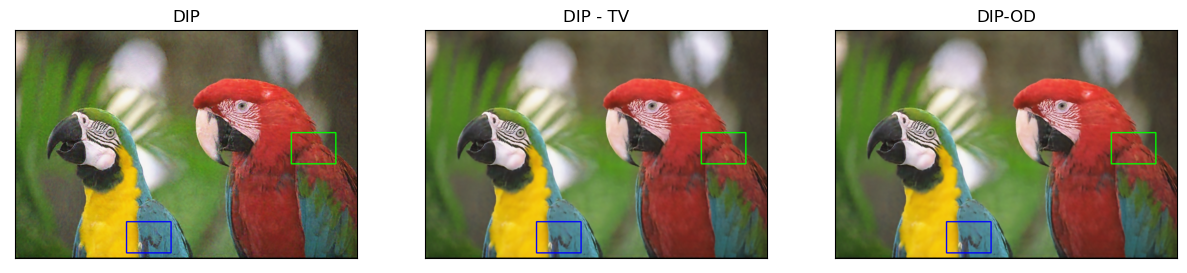

In [34]:
namefig = "Kodim23CompaDiracZoom.png" 
names=['DIP', 'DIP - TV','DIP-OD']
printImgs(ls, 1, 3, namefig,names)

In [35]:
recorte1G =imgDIPrec[a_x+1:b_x,a_y+1:b_y,:].copy()
recorte2G =imgDIPTVrec[a_x+1:b_x,a_y+1:b_y,:].copy()
recorte3G =imgODrec[a_x+1:b_x,a_y+1:b_y,:].copy()

recorte1B =imgDIPrec[c_x+1:d_x,c_y+1:d_y,:].copy()
recorte2B =imgDIPTVrec[c_x+1:d_x,c_y+1:d_y,:].copy()
recorte3B =imgODrec[c_x+1:d_x,c_y+1:d_y,:].copy()


ls=[recorte1G,recorte2G,recorte3G,recorte1B,recorte2B,recorte3B]

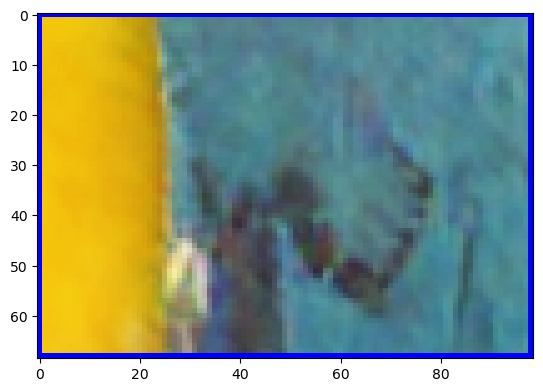

In [36]:
plt.imshow(recorte1B)

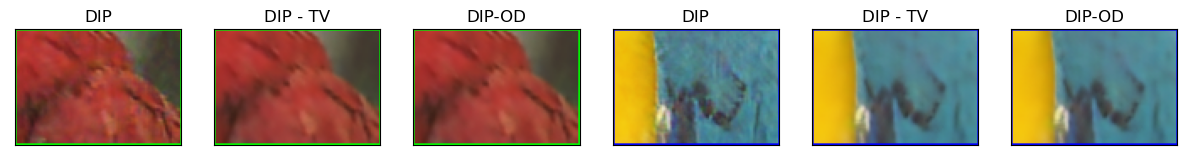

In [37]:
namefig = "Kodim23CompaDiracZoomRec.png" 
names=['DIP', 'DIP - TV','DIP-OD','DIP', 'DIP - TV','DIP-OD']
printImgs(ls, 1, 6, namefig,names)